# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

In [95]:
# Read Text Files with Pandas using read_csv()
  
# importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
  
# read text file into pandas DataFrame
df = pd.read_csv('transactions.TXT', sep=" ", names=["transaction_dates", "transaction_hours", "transaction_amount"])

# clean up any special characters besides a-z A-Z 0-9 and decimal point
# convert date to datetime, convert amount to float
df['transaction_dates'] = df['transaction_dates'].str.replace('[^a-zA-Z0-9]',"", regex = True)
df['transaction_dates'] = pd.to_datetime(df['transaction_dates'])
df['transaction_amount'] = df['transaction_amount'].str.replace('[^a-zA-Z0-9.]',"", regex = True).astype(float)

# display DataFrame
display(df)


transaction_dates  transaction_hours  transaction_amount
NaN NaN        2021-01-16  00:05:54.000000',               25.05
    NaN        2021-01-07  20:53:04.000000',              124.00
    NaN        2021-01-18  22:55:37.000000',               66.58
    NaN        2021-01-21  00:36:57.000000',                9.99
    NaN        2021-01-19  06:31:10.000000',               22.27
...                   ...                ...                 ...
    NaN        2021-01-11  00:06:39.000000',               87.10
    NaN        2021-01-01  02:01:09.000000',              518.20
    NaN        2021-01-15  20:55:58.000000',               47.72
    NaN        2021-01-02  00:09:43.000000',               49.00
    NaN        2021-01-08  00:49:22.000000',               31.61

[114 rows x 3 columns]

In [96]:
# sort by transaction_dates
df2 = df.sort_values(by="transaction_dates", ascending=True)

# clean out the unnecessary hours column
del df2["transaction_hours"]

# display DataFrame
display(df2)

transaction_dates  transaction_amount
NaN NaN        2021-01-01              518.20
    NaN        2021-01-01             5000.00
    NaN        2021-01-01              900.00
    NaN        2021-01-02               49.00
    NaN        2021-01-02               84.31
...                   ...                 ...
    NaN        2021-01-30               59.37
    NaN        2021-01-30              400.00
    NaN        2021-01-31               23.10
    NaN        2021-01-31               19.00
    NaN        2021-01-31               17.33

[114 rows x 2 columns]

In [97]:
# group by daily
df3 = df2.groupby(["transaction_dates"]).sum()

# display DataFrame
display(df3)

,transaction_amount
transaction_dates,
2021-01-01,6418.20
2021-01-02,646.31
2021-01-03,54.06
2021-01-04,1285.16
2021-01-05,835.55
2021-01-06,444.60
2021-01-07,975.80
2021-01-08,347.40
2021-01-09,1033.49


In [98]:
# saving only the transaction_amount for 3 day sma calculation
# using .to_frame() to convert df3["transaction_amount"] pandas series into dataframe
df4 = df3["transaction_amount"].to_frame()

# calculating 3 day sma with .rolling(window_size=3).mean()
df4["3_day_sma"] = df4["transaction_amount"].rolling(3).mean()

# clean up any NA or NULL values
df4.dropna(inplace=True)

# show table
display(df4)

,transaction_amount,3_day_sma
transaction_dates,,
2021-01-03,54.06,2372.856667
2021-01-04,1285.16,661.843333
2021-01-05,835.55,724.923333
2021-01-06,444.60,855.103333
2021-01-07,975.80,751.983333
2021-01-08,347.40,589.266667
2021-01-09,1033.49,785.563333
2021-01-10,751.75,710.880000
2021-01-11,2303.94,1363.060000


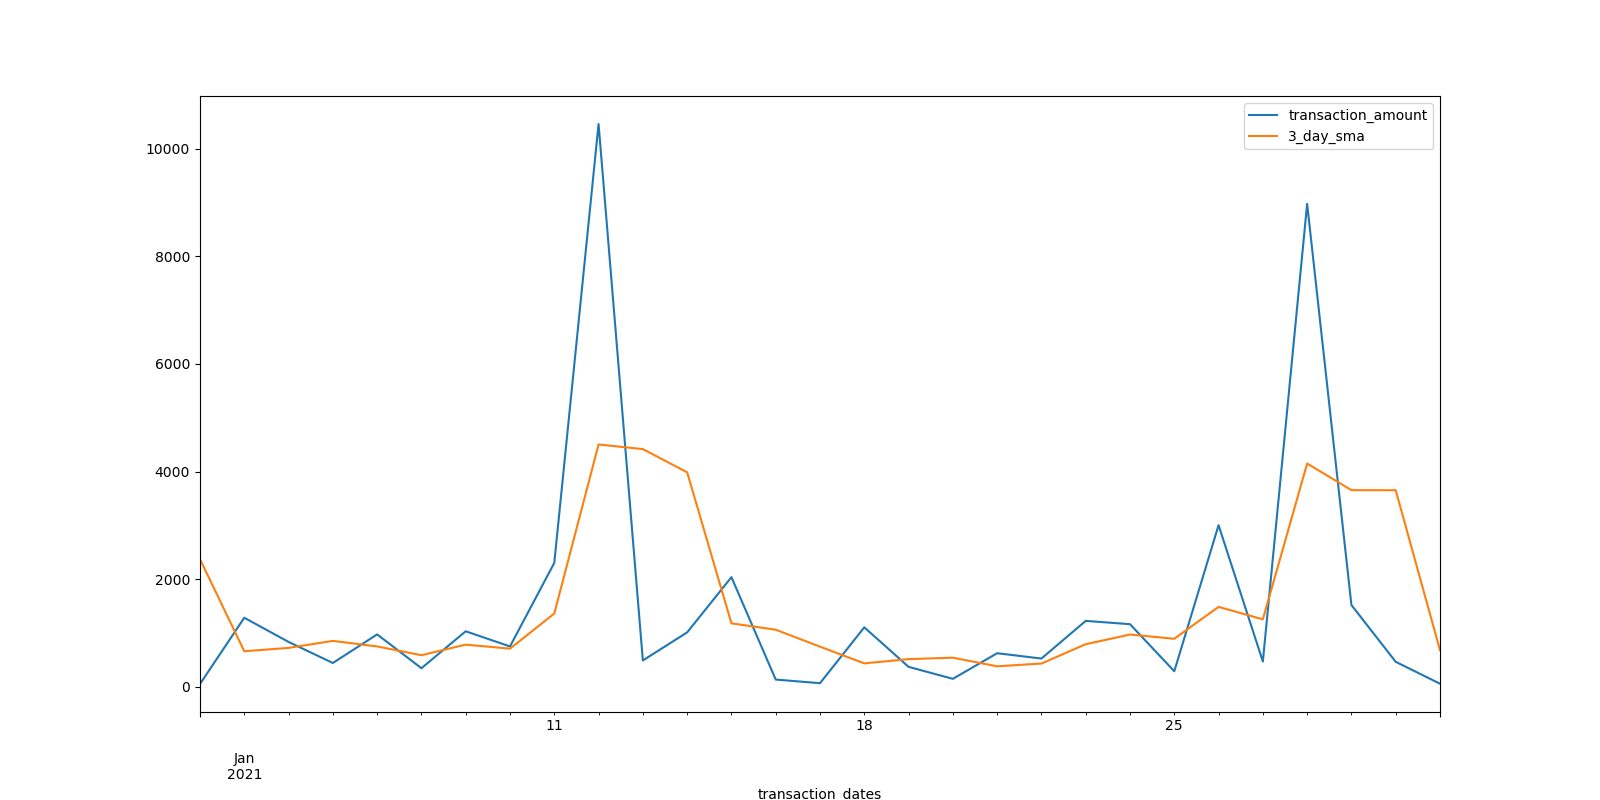

In [99]:
# plot the transaction amount vs 3 day sma using .plot() method
df4[["transaction_amount","3_day_sma"]].plot(label = "transactions", figsize=(16,8))

plt.show()